# Downloading the dataset

In [1]:
!curl https://topcs.blob.core.windows.net/public/FlightData.csv -o flightdata.csv


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1552k  100 1552k    0     0   790k      0  0:00:01  0:00:01 --:--:--  794k


# Importing the dataset

In [2]:
# importing pandas library of python
import pandas as pd

# Reading the csv file of the dataset into df in the form of data frame
df = pd.read_csv('flightdata.csv')

# Printing the first 5 rows of the dataset
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


In [3]:
# To find the shape of the dataset i.e. count of rows and column
df.shape

(11231, 26)

# Data Preprocessing

In [4]:
df.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK',
       'UNIQUE_CARRIER', 'TAIL_NUM', 'FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN',
       'DEST_AIRPORT_ID', 'DEST', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY',
       'DEP_DEL15', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'ARR_DEL15',
       'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME',
       'DISTANCE', 'Unnamed: 25'],
      dtype='object')

In [5]:
# Now we should check whether our data contains missing values or not 
df.isnull().values.any()

True

In [6]:
# Below function shows the eact count of missing values in each column
df.isnull().sum()

YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
UNIQUE_CARRIER             0
TAIL_NUM                   0
FL_NUM                     0
ORIGIN_AIRPORT_ID          0
ORIGIN                     0
DEST_AIRPORT_ID            0
DEST                       0
CRS_DEP_TIME               0
DEP_TIME                 107
DEP_DELAY                107
DEP_DEL15                107
CRS_ARR_TIME               0
ARR_TIME                 115
ARR_DELAY                188
ARR_DEL15                188
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ACTUAL_ELAPSED_TIME      188
DISTANCE                   0
Unnamed: 25            11231
dtype: int64

Observe Carefully
Curiously, the 26th column ("Unnamed: 25") contains 11,231 missing values, which equals the number of rows in the dataset. 
This column was mistakenly created because the CSV file that you imported contains a comma at the end of each line.

In [7]:
# To remove the column from data frame 

df = df.drop('Unnamed: 25', axis=1)
df.isnull().sum()

YEAR                     0
QUARTER                  0
MONTH                    0
DAY_OF_MONTH             0
DAY_OF_WEEK              0
UNIQUE_CARRIER           0
TAIL_NUM                 0
FL_NUM                   0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
DEST_AIRPORT_ID          0
DEST                     0
CRS_DEP_TIME             0
DEP_TIME               107
DEP_DELAY              107
DEP_DEL15              107
CRS_ARR_TIME             0
ARR_TIME               115
ARR_DELAY              188
ARR_DEL15              188
CANCELLED                0
DIVERTED                 0
CRS_ELAPSED_TIME         0
ACTUAL_ELAPSED_TIME    188
DISTANCE                 0
dtype: int64

Next Step is to filter the dataset to eliminate columns that aren't relevant to a predictive model
     
     For example, the aircraft's tail number probably has little bearing on whether a flight will arrive on time, and at the time you book a ticket, you have no way of knowing whether a flight will be cancelled, diverted, or delayed. By contrast, the scheduled departure time could have a lot to do with on-time arrivals

In [8]:
# Filtering out the unwanted columns i.e. keeping only relevant columns
df = df[["MONTH", "DAY_OF_MONTH", "DAY_OF_WEEK", "ORIGIN", "DEST", "CRS_DEP_TIME", "ARR_DEL15"]]
df.isnull().sum()

MONTH             0
DAY_OF_MONTH      0
DAY_OF_WEEK       0
ORIGIN            0
DEST              0
CRS_DEP_TIME      0
ARR_DEL15       188
dtype: int64

In [9]:

df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
0,1,1,5,ATL,SEA,1905,0.0
1,1,1,5,DTW,MSP,1345,0.0
2,1,1,5,ATL,SEA,940,0.0
3,1,1,5,SEA,MSP,819,0.0
4,1,1,5,SEA,DTW,2300,0.0



The only column that now contains missing values is the ARR_DEL15 column, 
which uses 0s to identify flights that arrived on time and 1s for flights that didn't.

In [10]:
#Showing first five rows of the missing values
# axis=1 means we are considering a column 
df[df.isnull().values.any(axis=1)].head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
177,1,9,6,MSP,SEA,701,NaN
179,1,10,7,MSP,DTW,1348,NaN
184,1,10,7,MSP,DTW,625,NaN
210,1,10,7,DTW,MSP,1200,NaN
478,1,22,5,SEA,JFK,2305,NaN


NaN represents Not a Number which is null value or missing value in pandas
    
The reason these rows are missing ARR_DEL15 values is that they all correspond to flights that were canceled or diverted. You could call dropna on the DataFrame to remove these rows. But since a flight that is canceled or diverted to another airport could be considered "late," let's use the fillna method to replace the missing values with 1s.

In [11]:
df = df.fillna({'ARR_DEL15': 1})
df.iloc[177:185]

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
177,1,9,6,MSP,SEA,701,1.0
178,1,9,6,DTW,JFK,1527,0.0
179,1,10,7,MSP,DTW,1348,1.0
180,1,10,7,DTW,MSP,1540,0.0
181,1,10,7,JFK,ATL,1325,0.0
182,1,10,7,JFK,ATL,610,0.0
183,1,10,7,JFK,SEA,1615,0.0
184,1,10,7,MSP,DTW,625,1.0


   Now prepare the dataset to be using in Machine Learning
   
   1. The CRS_DEP_TIME column of the dataset you are using represents scheduled departure times. The granularity of the numbers in this column — it contains more than 500 unique values — could have a negative impact on accuracy in a machine-learning model. This can be resolved using a technique called binning or quantization. What if you divided each number in this column by 100 and rounded down to the nearest integer? 1030 would become 10, 1925 would become 19, and so on, and you would be left with a maximum of 24 discrete values in this column. Intuitively, it makes sense, because it probably doesn't matter much whether a flight leaves at 10:30 a.m. or 10:40 a.m. It matters a great deal whether it leaves at 10:30 a.m. or 5:30 p.m.
   
   
2. the dataset's ORIGIN and DEST columns contain airport codes that represent categorical machine-learning values. These columns need to be converted into discrete columns containing indicator variables, sometimes known as "dummy" variables. In other words, the ORIGIN column, which contains five airport codes, needs to be converted into five columns, one per airport, with each column containing 1s and 0s indicating whether a flight originated at the airport that the column represents. The DEST column needs to be handled in a similar manner.

In [12]:
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
0,1,1,5,ATL,SEA,1905,0.0
1,1,1,5,DTW,MSP,1345,0.0
2,1,1,5,ATL,SEA,940,0.0
3,1,1,5,SEA,MSP,819,0.0
4,1,1,5,SEA,DTW,2300,0.0


In [13]:
# To bin the departure time
import math

for index, row in df.iterrows():
    df.loc[index, 'CRS_DEP_TIME'] = math.floor(row['CRS_DEP_TIME'] / 100)
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
0,1,1,5,ATL,SEA,19,0.0
1,1,1,5,DTW,MSP,13,0.0
2,1,1,5,ATL,SEA,9,0.0
3,1,1,5,SEA,MSP,8,0.0
4,1,1,5,SEA,DTW,23,0.0


In [14]:
# Now getting the dummy columns for origin and destination
df = pd.get_dummies(df, columns=['ORIGIN', 'DEST'])
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,ARR_DEL15,ORIGIN_ATL,ORIGIN_DTW,ORIGIN_JFK,ORIGIN_MSP,ORIGIN_SEA,DEST_ATL,DEST_DTW,DEST_JFK,DEST_MSP,DEST_SEA
0,1,1,5,19,0.0,1,0,0,0,0,0,0,0,0,1
1,1,1,5,13,0.0,0,1,0,0,0,0,0,0,1,0
2,1,1,5,9,0.0,1,0,0,0,0,0,0,0,0,1
3,1,1,5,8,0.0,0,0,0,0,1,0,0,0,1,0
4,1,1,5,23,0.0,0,0,0,0,1,0,1,0,0,0


Now data set is optimised to be fed in Machine Learning Model

         Machine Learning Model
      Use scikit-learn to create the machine learning model.

        Now we need two datasets for our model:
        
           1. Testing (20%)
           2. Training (80%)
           
Also separate the DataFrame into feature columns and label columns. The feature columns used as input to the model (for example, the flight's origin and destination and the scheduled departure time), while the latter contains the column that the model will attempt to predict — in this case, the ARR_DEL15 column, which indicates whether a flight will arrive on time

In [15]:
from sklearn.model_selection import train_test_split

#train_test_split function return 4 data frames

# Splitting the dataset into training (80% of data) and testing(20% of data) 
train_x, test_x, train_y, test_y = train_test_split(df.drop('ARR_DEL15', axis=1), df['ARR_DEL15'], test_size=0.2, random_state=42)


The random_state parameter seeds the random-number generator used to do the splitting, while the first and second parameters are DataFrames containing the feature columns and the label column.

In [16]:
#  Training set of features and labels columns
print(train_x.shape, train_y.shape)



# Testing set of features and labels columns
print(test_x.shape, test_y.shape)

(8984, 14) (8984,)
(2247, 14) (2247,)


Machine Learning Model


There are many types of machine learning models.

     -One of the most common is the regression model, which uses one of a number of regression algorithms to produce a numeric value —         for example, a person's age or the probability that a credit-card transaction is fraudulent.

     -In this we will train a classification model, which seeks to resolve a set of inputs into one of a set of known outputs. A classic       example of a classification model is one that examines e-mails and classifies them as "spam" or "not spam." Your model will be a         binary classification model that predicts whether a flight will arrive on-time or late ("binary" because there are only two               possible outputs).

Using Scikit-Learn to build our model

     One of the benefits of using scikit-learn is that you don't have to build these models — or implement the algorithms that they use —      by hand. Scikit-learn includes a variety of classes for implementing common machine learning models.
     
RandomForestClassifier

     which fits multiple decision trees to the data and uses averaging to boost the overall accuracy and limit overfitting.

    overfitting is the production of an analysis that corresponds too closely or exactly to a particular set of data, and may therefore       fail to fit additional data or predict future observations reliably.


    The green line represents an overfitted model and the black line represents a regularized model.
    While the green line best follows the training data, it is too dependent on that data and it is likely to have a higher error rate on     new unseen data, compared to the black line.

In [17]:

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=13)

#Training the model 
model.fit(train_x, train_y)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=13, verbose=0, warm_start=False)

The output shows the parameters used in the classifier, including n_estimators, which specifies the number of trees in each decision-tree forest, and max_depth, which specifies the maximum depth of the decision trees. The values shown are the defaults, but you can override any of them when creating the RandomForestClassifier object.

In [18]:
# To test the model using values in test_x
predicted = model.predict(test_x)

# To determine the mean accuracy of the model
model.score(test_x, test_y)

0.8602581219403649

In [19]:

# Prediction Probabilities i.e. the Answers model can predict using test data

from sklearn.metrics import roc_auc_score

probabilities = model.predict_proba(test_x)

In [20]:
# To generate an ROC AUC score from the probabilities using scikit-learn's roc_auc_score method

roc_auc_score(test_y, probabilities[:, 1])

0.6743824904998539

Why is the AUC score lower than the mean accuracy computed in the previous exercise?

The output from the score method reflects how many of the items in the test set the model predicted correctly. This score is skewed by the fact that the dataset the model was trained and tested with contains many more rows representing on-time arrivals than rows representing late arrivals. Because of this imbalance in the data, you're more likely to be correct if you predict that a flight will be on time than if you predict that a flight will be late.

ROC AUC takes this into account and provides a more accurate indication of how likely it is that a prediction of on-time or late will be correct

We can learn more about this model's behavior by generating a confusion matrix, also known as an error matrix.¶

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, predicted)

array([[1882,   54],
       [ 260,   51]])


Look at the second row, which represents flights that were delayed. The first column shows how many delayed flights were incorrectly predicted to be on time. The second column shows how many flights were correctly predicted to be delayed. Clearly, the model isn't nearly as adept at predicting that a flight will be delayed as it is at predicting that a flight will arrive on time. What you want in a confusion matrix is large numbers in the upper-left and lower-right corners, and small numbers (preferably zeros) in the upper-right and lower-left corners.

Other measures of accuracy for a classification model include precision and recall.

Suppose the model was presented with three on-time arrivals and three delayed arrivals, and that it correctly predicted two of the on-time arrivals, but incorrectly predicted that two of the delayed arrivals would be on time. In this case, the precision would be 50% (two of the four flights it classified as being on time actually were on time), while its recall would be 67% (it correctly identified two of the three on-time arrivals).

In [22]:
from sklearn.metrics import precision_score

train_predictions = model.predict(train_x)

# Measuring Precision 
precision_score(train_y, train_predictions)

0.9972375690607734

In [23]:

from sklearn.metrics import recall_score


# Measuring Recall score of the model
recall_score(train_y, train_predictions)

0.8650159744408946

# Visualize

Use Matplotlib to visualize the model's performance i.e. output from the model.

In [24]:

%matplotlib inline # It enables Jupyter to render Matplotlib output in a notebook without making repeated calls to show.
import matplotlib.pyplot as plt
import seaborn as sns # Use to enhance the output of matplotplib.

sns.set()

UsageError: unrecognized arguments: # It enables Jupyter to render Matplotlib output in a notebook without making repeated calls to show.


# ROC Curve Plot

In [25]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

fpr, tpr, _ = roc_curve(test_y, probabilities[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

Text(0, 0.5, 'True Positive Rate')

    . The dotted line in the middle of the graph represents a 50-50 chance of obtaining a correct answer.
    . The blue curve represents the accuracy of your model.
    
    
Predict Delays: Python function that calls the machine-learning model you built in the previous lab to compute the likelihood that a flight will be on time. Then we will use this function to analyze several flights.

In [26]:
def predict_delay(departure_date_time, origin, destination):
    from datetime import datetime

    try:
        departure_date_time_parsed = datetime.strptime(departure_date_time, '%d/%m/%Y %H:%M:%S')
    except ValueError as e:
        return 'Error parsing date/time - {}'.format(e)

    month = departure_date_time_parsed.month
    day = departure_date_time_parsed.day
    day_of_week = departure_date_time_parsed.isoweekday()
    hour = departure_date_time_parsed.hour

#     Converting in upper case
    origin = origin.upper()
    destination = destination.upper()
    input = [{'MONTH': month,
              'DAY': day,
              'DAY_OF_WEEK': day_of_week,
              'CRS_DEP_TIME': hour,
              'ORIGIN_ATL': 1 if origin == 'ATL' else 0,
              'ORIGIN_DTW': 1 if origin == 'DTW' else 0,
              'ORIGIN_JFK': 1 if origin == 'JFK' else 0,
              'ORIGIN_MSP': 1 if origin == 'MSP' else 0,
              'ORIGIN_SEA': 1 if origin == 'SEA' else 0,
              'DEST_ATL': 1 if destination == 'ATL' else 0,
              'DEST_DTW': 1 if destination == 'DTW' else 0,
              'DEST_JFK': 1 if destination == 'JFK' else 0,
              'DEST_MSP': 1 if destination == 'MSP' else 0,
              'DEST_SEA': 1 if destination == 'SEA' else 0 }]

    return model.predict_proba(pd.DataFrame(input))[0][0]


This function takes as input a date and time, an origin airport code, and a destination airport code, and returns a value between 0.0 and 1.0 indicating the probability that the flight will arrive at its destination on time. It uses the machine-learning model you built above to compute the probability. And to call the model, it passes a DataFrame containing the input values to predict_proba. The structure of the DataFrame exactly matches the structure of the DataFrame we used earlier.

To compute the probability that a flight from New York to Atlanta on the evening of October 1 will arrive on time.

In [27]:
predict_delay('1/10/2018 21:45:00', 'JFK', 'ATL')

0.6

In [28]:
#to compute the probability that the same flight a day later will arrive on time:
predict_delay('2/10/2018 21:45:00', 'JFK', 'ATL')

0.8

In [29]:
# to compute the probability that a morning flight the same day from Atlanta to Seattle will arrive on time:
predict_delay('2/10/2018 10:00:00', 'ATL', 'SEA')

1.0

# We now have an easy way to predict, with a single line of code, whether a flight is likely to be on time or late.

(0.0, 1.0)

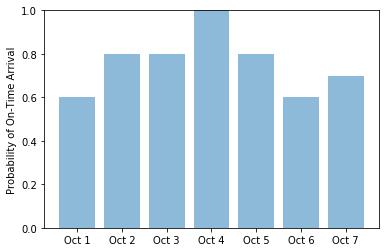

In [30]:
# code to plot the probability of on-time arrivals for an evening flight from JFK to ATL over a range of days:

import numpy as np

labels = ('Oct 1', 'Oct 2', 'Oct 3', 'Oct 4', 'Oct 5', 'Oct 6', 'Oct 7')
values = (predict_delay('1/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('2/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('3/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('4/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('5/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('6/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('7/10/2018 21:45:00', 'JFK', 'ATL'))
alabels = np.arange(len(labels))

plt.bar(alabels, values, align='center', alpha=0.5)
plt.xticks(alabels, labels)
plt.ylabel('Probability of On-Time Arrival')
plt.ylim((0.0, 1.0))